# Kaggle Competition : Predict Health Outcomes of Horses

https://www.kaggle.com/competitions/playground-series-s3e22/overview

In [304]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load Data

In [11]:
# train data
df_train = pd.read_csv(r'C:\Users\soyou\Dropbox\합격\LG_CNS\horse_prediction/train.csv')
df_train.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [85]:
df_train['id'].max()

1234

In [12]:
# test data
df_test = pd.read_csv(r'C:\Users\soyou\Dropbox\합격\LG_CNS\horse_prediction/test.csv')
df_test.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
3,1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,...,distend_large,75.0,81.0,None,1.0,yes,1400,0,0,no
4,1239,yes,adult,529840,38.3,50.0,12.0,None,normal,bright_pink,...,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes


In [58]:
# train, test data 합치기

# df_test에 빈칸 채워넣기
outcome =  [np.nan] * df_test.shape[0]
df_test['outcome'] = outcome

df = pd.concat([df_train, df_test], axis = 0)
df.reset_index(drop = True, inplace = True)
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


## 2. Data description

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2059 non-null   int64  
 1   surgery                2059 non-null   object 
 2   age                    2059 non-null   object 
 3   hospital_number        2059 non-null   int64  
 4   rectal_temp            2059 non-null   float64
 5   pulse                  2059 non-null   float64
 6   respiratory_rate       2059 non-null   float64
 7   temp_of_extremities    2059 non-null   object 
 8   peripheral_pulse       2059 non-null   object 
 9   mucous_membrane        2059 non-null   object 
 10  capillary_refill_time  2059 non-null   object 
 11  pain                   2059 non-null   object 
 12  peristalsis            2059 non-null   object 
 13  abdominal_distention   2059 non-null   object 
 14  nasogastric_tube       2059 non-null   object 
 15  naso

In [29]:
df.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2059.000000,2.059000e+03,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000,2059.00000,2059.000000,2059.000000,2059.000000,2059.000000
mean,1029.000000,1.016073e+06,38.219136,79.836328,30.320544,4.432977,49.386693,21.15119,3.309136,3783.395338,13.723652,2.145702
std,594.526422,1.441049e+06,0.787378,29.125777,16.849999,1.916504,10.502382,26.56672,1.569174,5308.601956,195.013470,68.829878
min,0.000000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.50000,0.100000,0.000000,0.000000,0.000000
25%,514.500000,5.288000e+05,37.800000,54.000000,18.000000,2.000000,43.000000,6.60000,2.000000,2205.000000,0.000000,0.000000
50%,1029.000000,5.297960e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.50000,3.200000,2209.000000,0.000000,0.000000
75%,1543.500000,5.342930e+05,38.600000,100.000000,36.000000,6.200000,56.000000,9.00000,4.300000,3205.000000,0.000000,0.000000
max,2058.000000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.00000,10.100000,41110.000000,4300.000000,2209.000000


In [30]:
# Data type이 object인 변수들의 unique value 개수

object_list = []

for col in df.columns:
    if df[col].dtypes == "object":
        object_list.append(col)
    else :
        pass

for obj in object_list:
    n_unique = df[obj].nunique()
    print(obj, ":", n_unique)

surgery : 2
age : 2
temp_of_extremities : 5
peripheral_pulse : 5
mucous_membrane : 7
capillary_refill_time : 4
pain : 8
peristalsis : 6
abdominal_distention : 5
nasogastric_tube : 4
nasogastric_reflux : 5
rectal_exam_feces : 6
abdomen : 6
abdomo_appearance : 4
surgical_lesion : 2
cp_data : 2
outcome : 3


In [31]:
# Data type이 object인 변수들의 unique value 확인

for obj in object_list:
    print(obj, ":", df[obj].unique())

surgery : ['yes' 'no']
age : ['adult' 'young']
temp_of_extremities : ['cool' 'cold' 'normal' 'warm' 'None']
peripheral_pulse : ['reduced' 'normal' 'None' 'absent' 'increased']
mucous_membrane : ['dark_cyanotic' 'pale_cyanotic' 'pale_pink' 'normal_pink' 'bright_pink'
 'bright_red' 'None']
capillary_refill_time : ['more_3_sec' 'less_3_sec' 'None' '3']
pain : ['depressed' 'mild_pain' 'extreme_pain' 'alert' 'severe_pain' 'None'
 'slight' 'moderate']
peristalsis : ['absent' 'hypomotile' 'normal' 'hypermotile' 'None' 'distend_small']
abdominal_distention : ['slight' 'moderate' 'none' 'severe' 'None']
nasogastric_tube : ['slight' 'none' 'significant' 'None']
nasogastric_reflux : ['less_1_liter' 'more_1_liter' 'none' 'None' 'slight']
rectal_exam_feces : ['decreased' 'absent' 'None' 'normal' 'increased' 'serosanguious']
abdomen : ['distend_small' 'distend_large' 'normal' 'firm' 'None' 'other']
abdomo_appearance : ['serosanguious' 'cloudy' 'clear' 'None']
surgical_lesion : ['yes' 'no']
cp_data :

<Axes: xlabel='outcome', ylabel='count'>

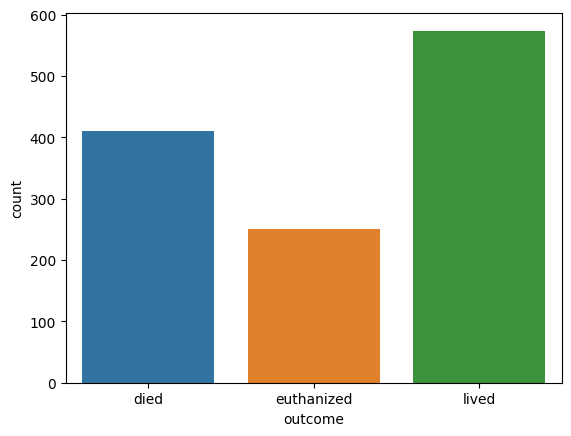

In [32]:
# outcome 비중

sns.countplot(data =df, x = 'outcome')

## 3. EDA

### 3-1. Object 타입 변수 탐색

C:\Users\soyou\anaconda3\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


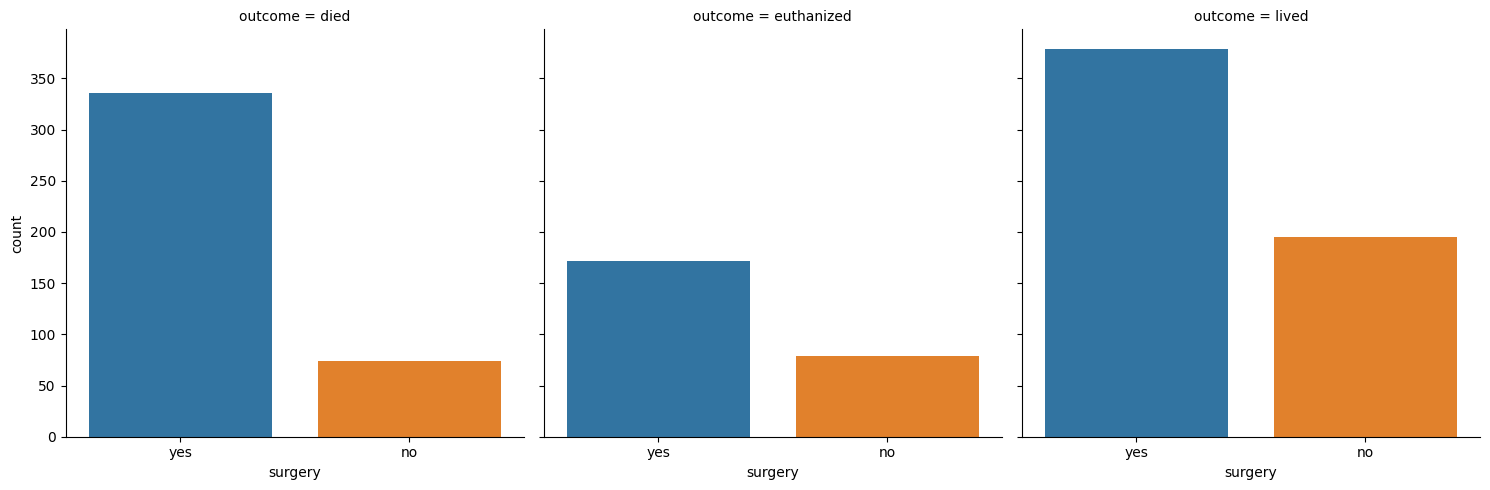

In [33]:
sns.catplot(data = df, x = "surgery", col = "outcome", kind = "count")

C:\Users\soyou\anaconda3\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


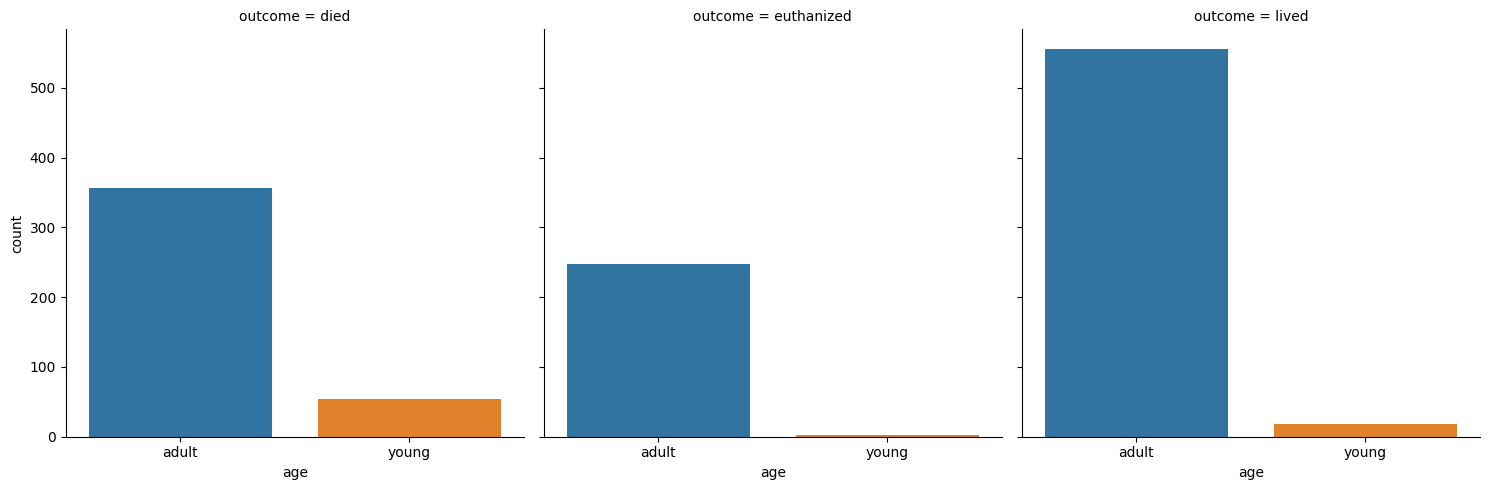

In [34]:
sns.catplot(data = df, x = "age", col = "outcome", kind = "count")

### => count로는 각 요인들이 각각의 outcome에 어떤 영향을 미치는지를 비교하기 어려움
### => outcome을 0 또는 1 더미변수로 만들어 확률 계산

In [35]:
outcome = list(df['outcome'])
df['outcome_2'] = outcome

In [36]:
# outcome 변수 더미변수 만들기
df = pd.get_dummies(df, columns = ['outcome_2'])

In [37]:
# 더미변수 column명 변경
df = df.rename(columns = {'outcome_2_died' : 'died', 'outcome_2_euthanized' : 'euthanized', 'outcome_2_lived' : 'lived'})

In [38]:
# data type 변경
df[['died', 'euthanized', 'lived']] = df[['died', 'euthanized', 'lived']].astype(int)

In [39]:
# plot 그리는 함수
def obj_type_plot(col) :
    
    fig,axe = plt.subplots(figsize = (25, 5), ncols = 3)

    sns.barplot(data = df, x = col, y = 'died', ax = axe[0])
    sns.barplot(data = df, x = col, y = 'euthanized', ax = axe[1])
    sns.barplot(data = df, x = col, y = 'lived', ax = axe[2])

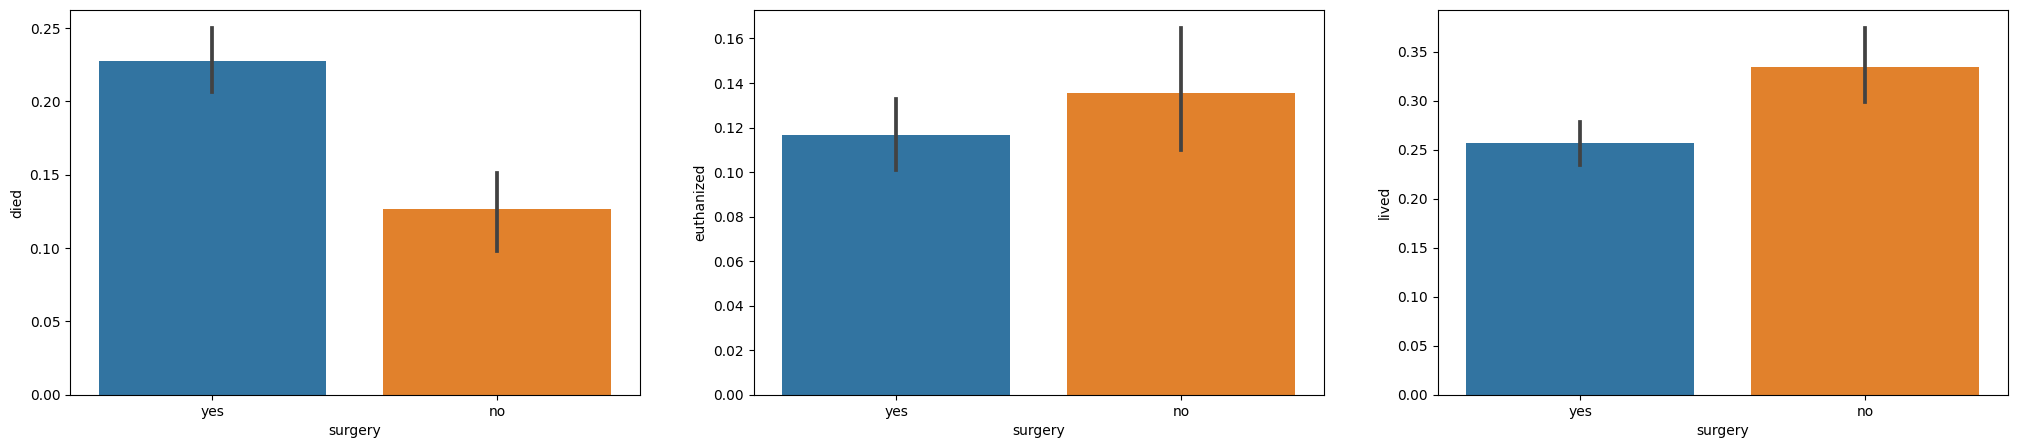

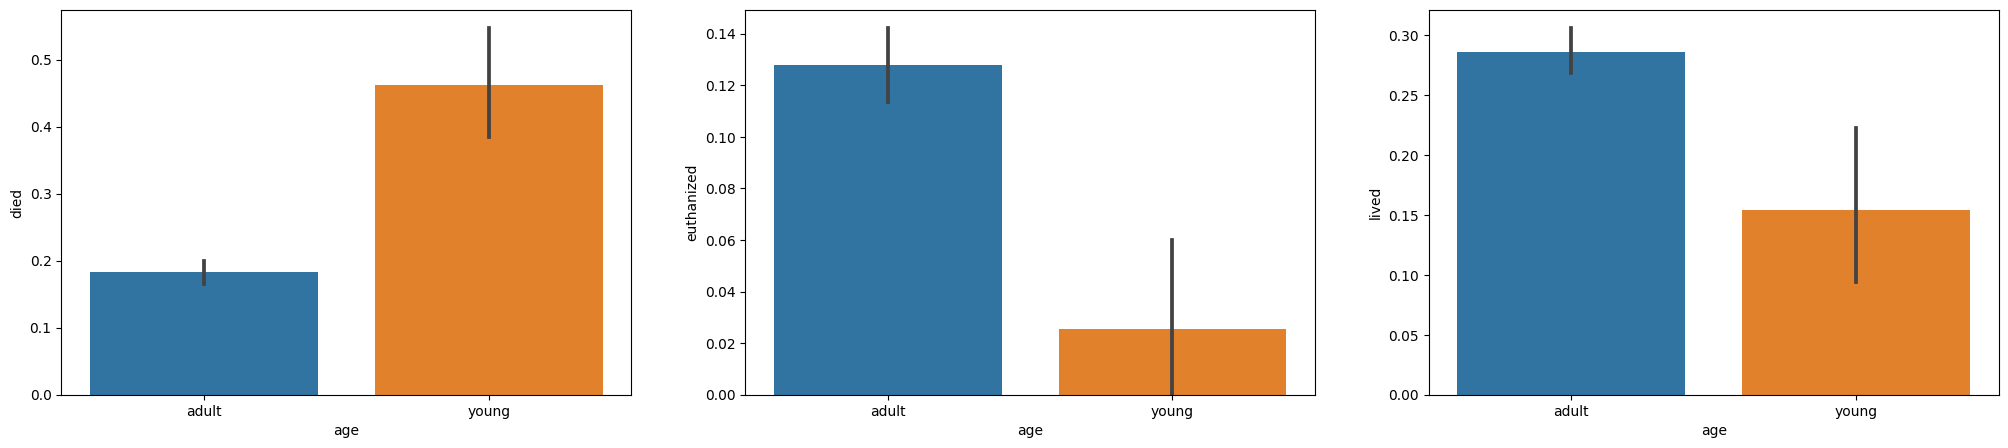

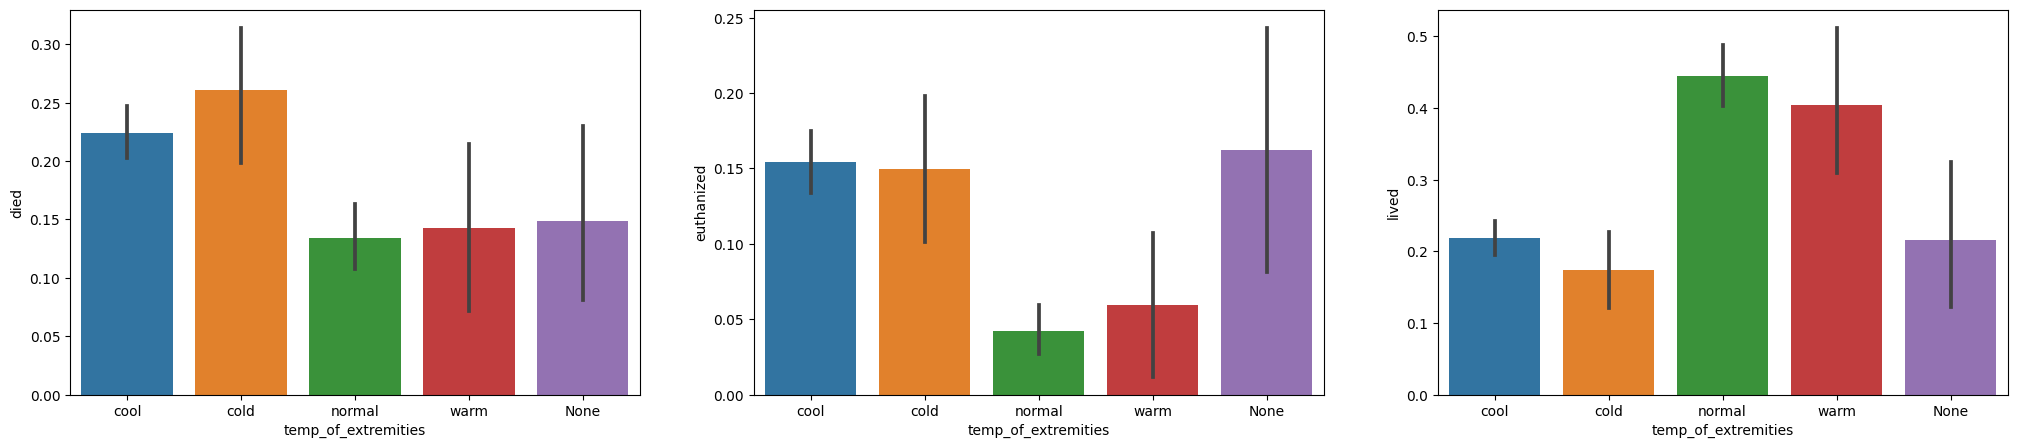

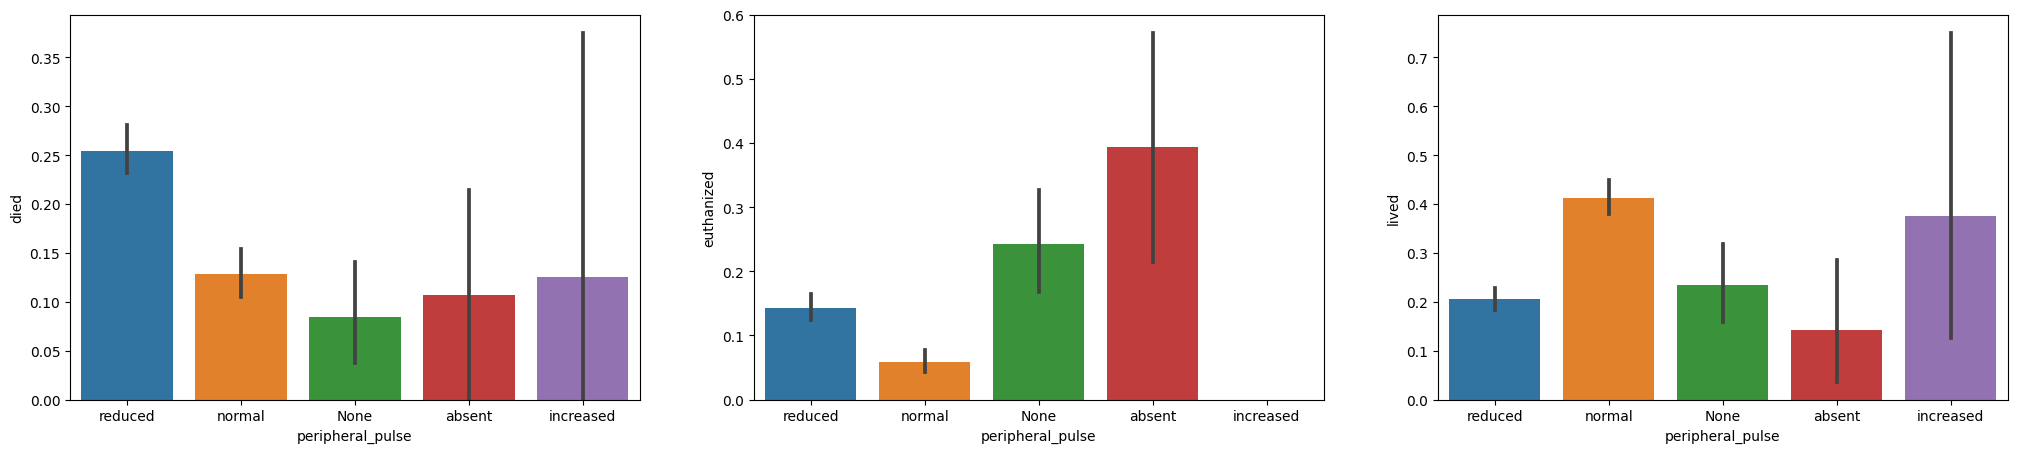

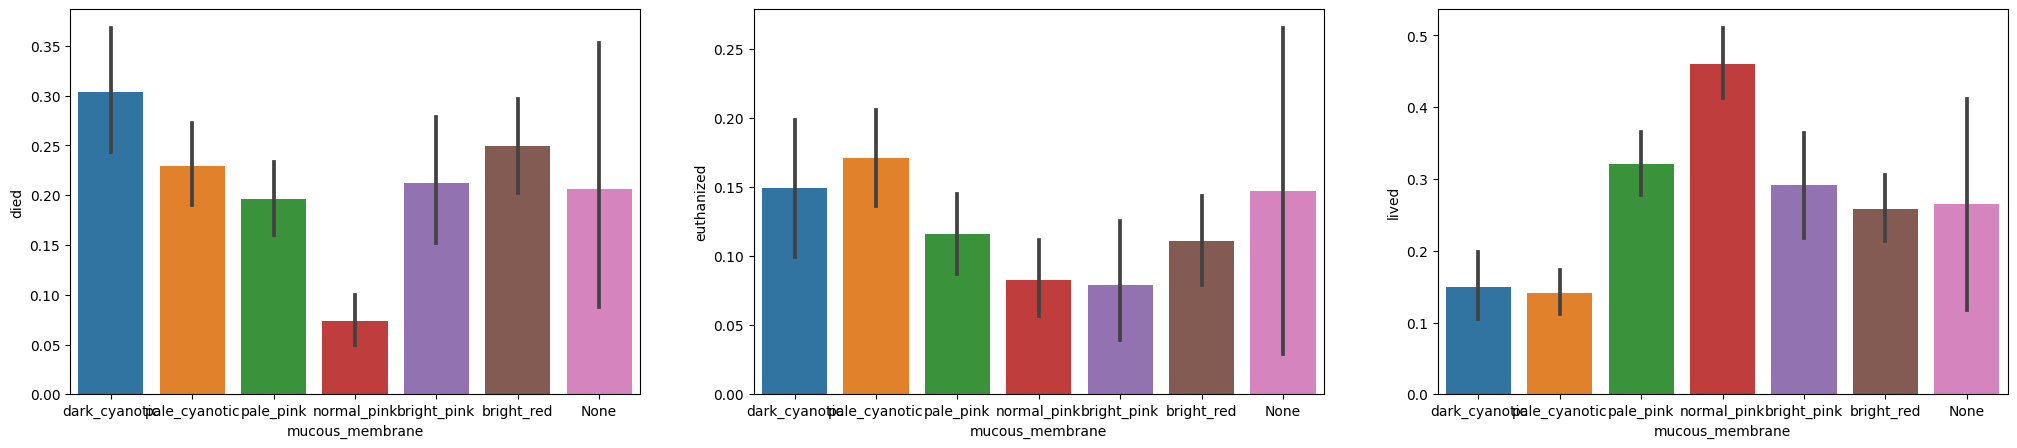

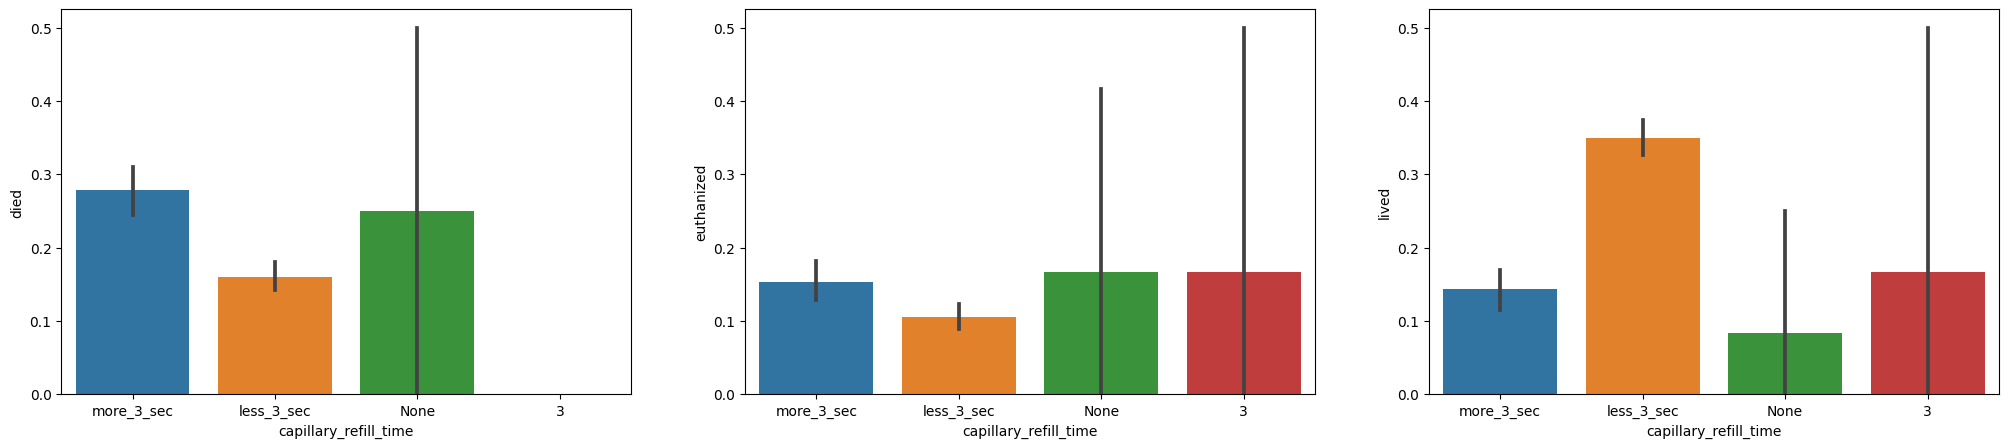

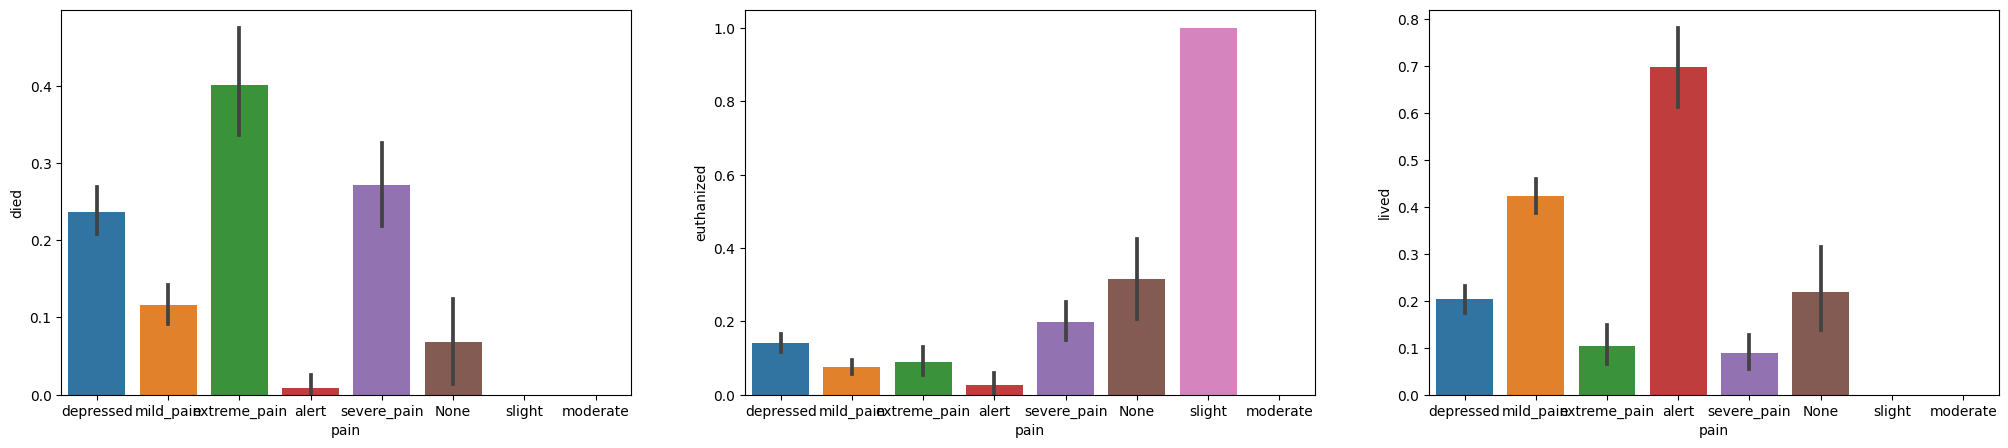

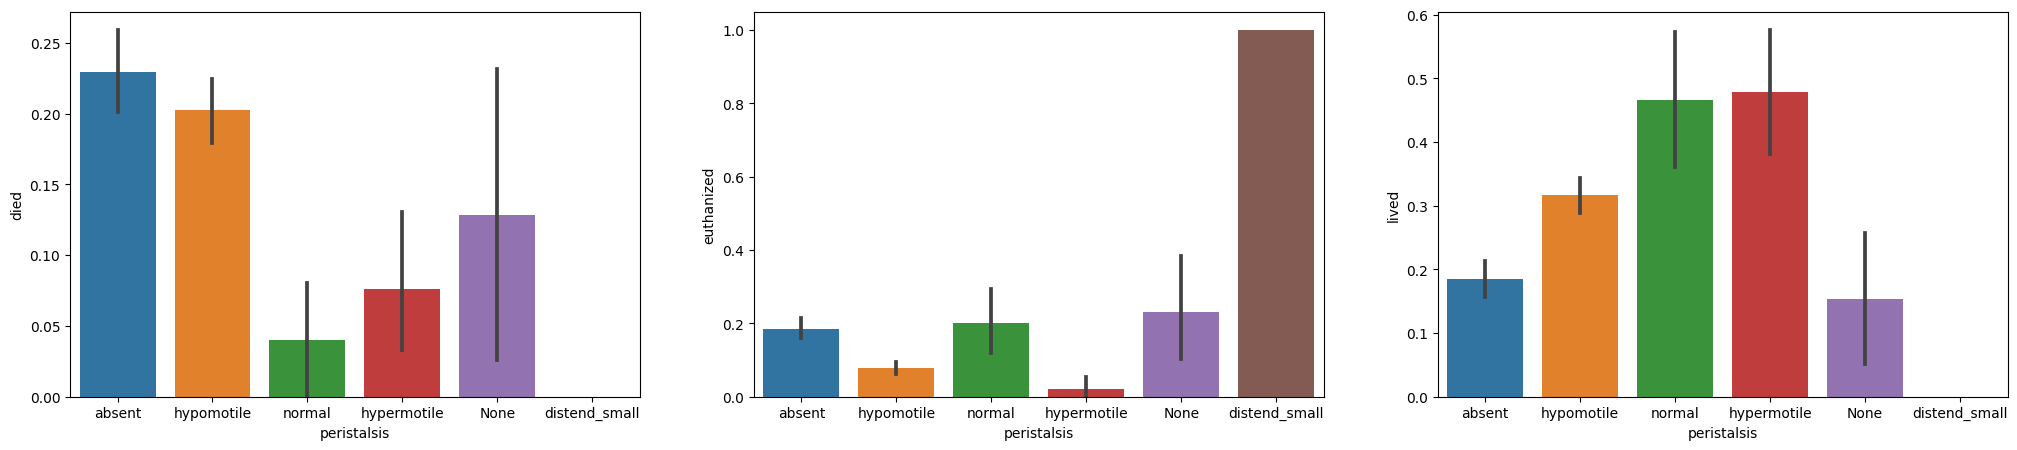

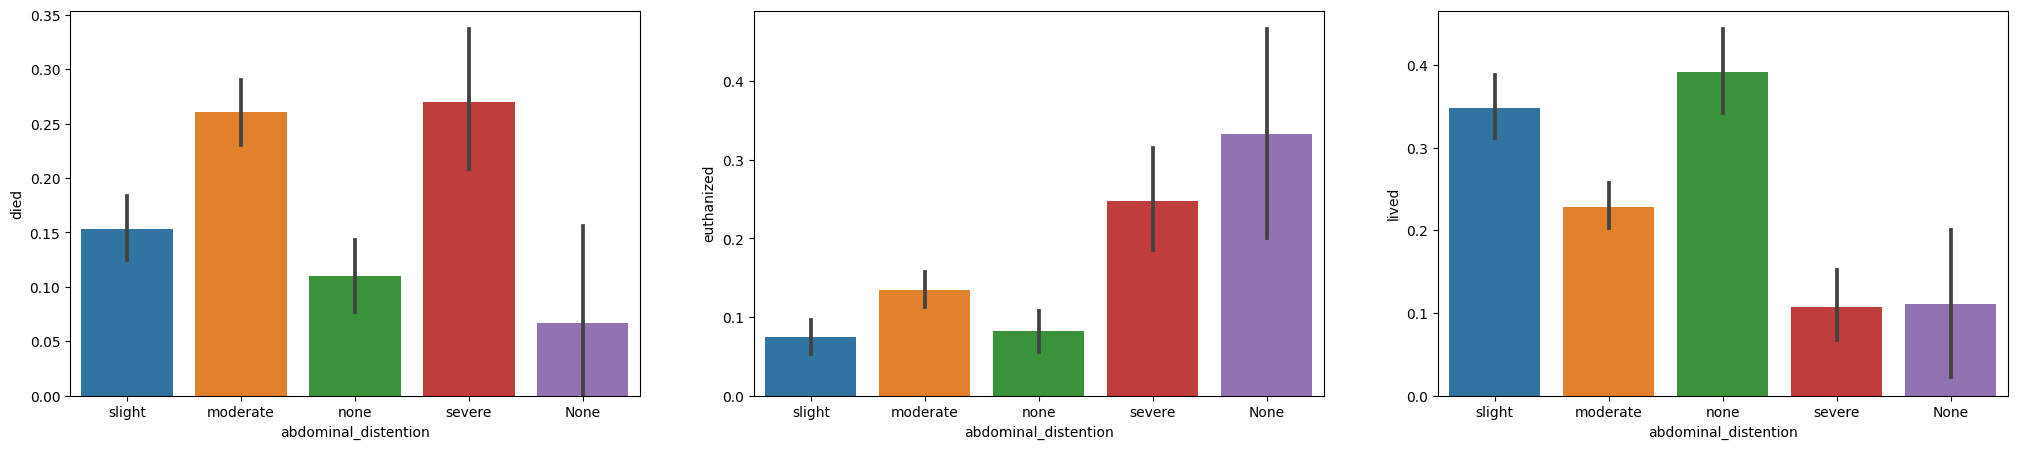

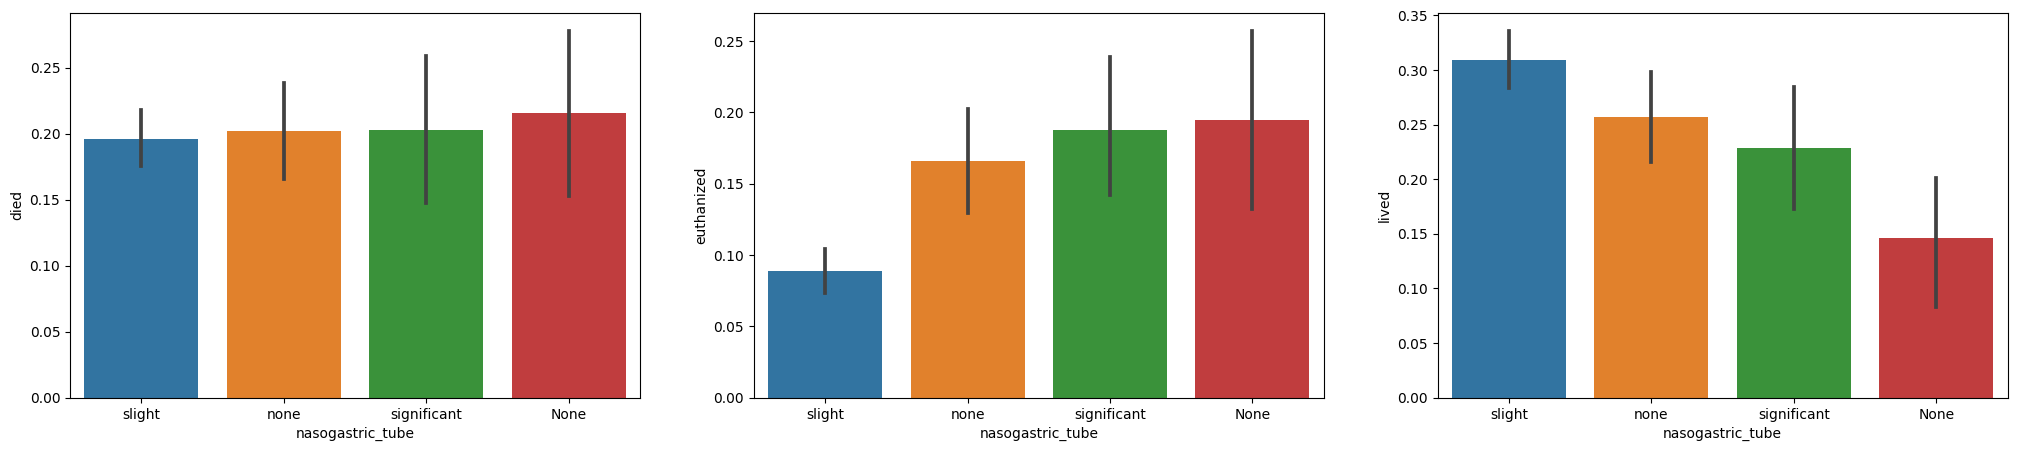

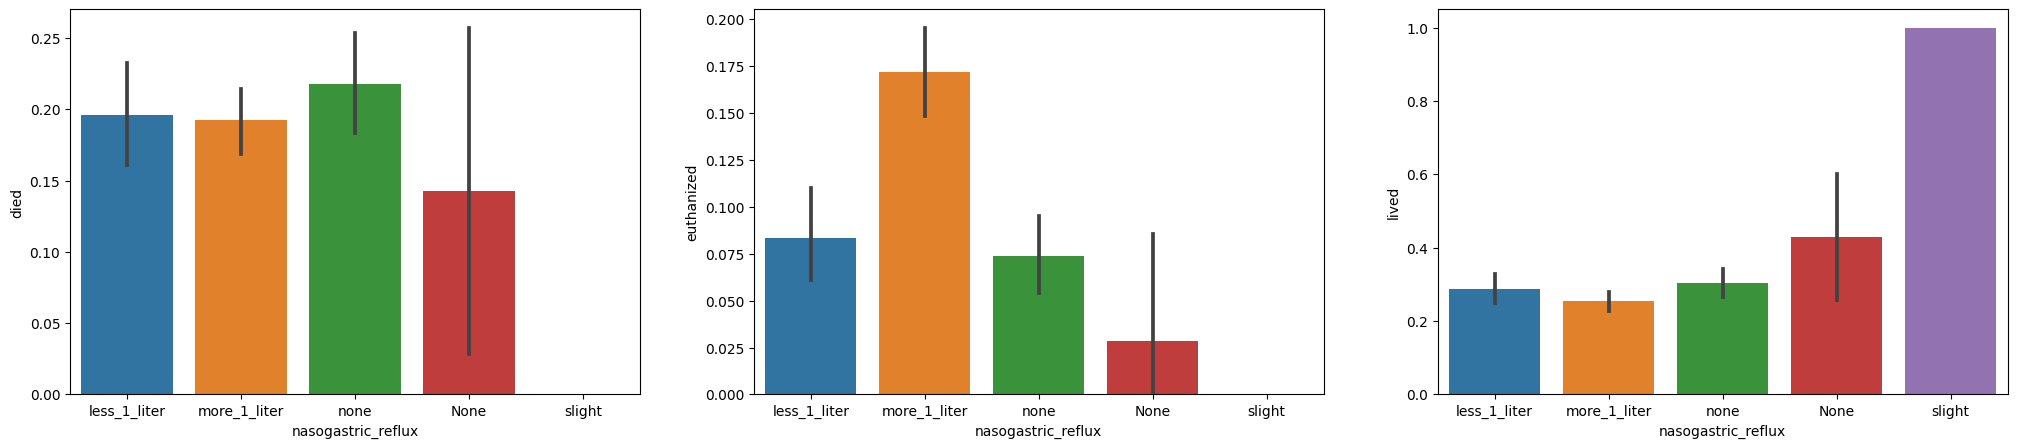

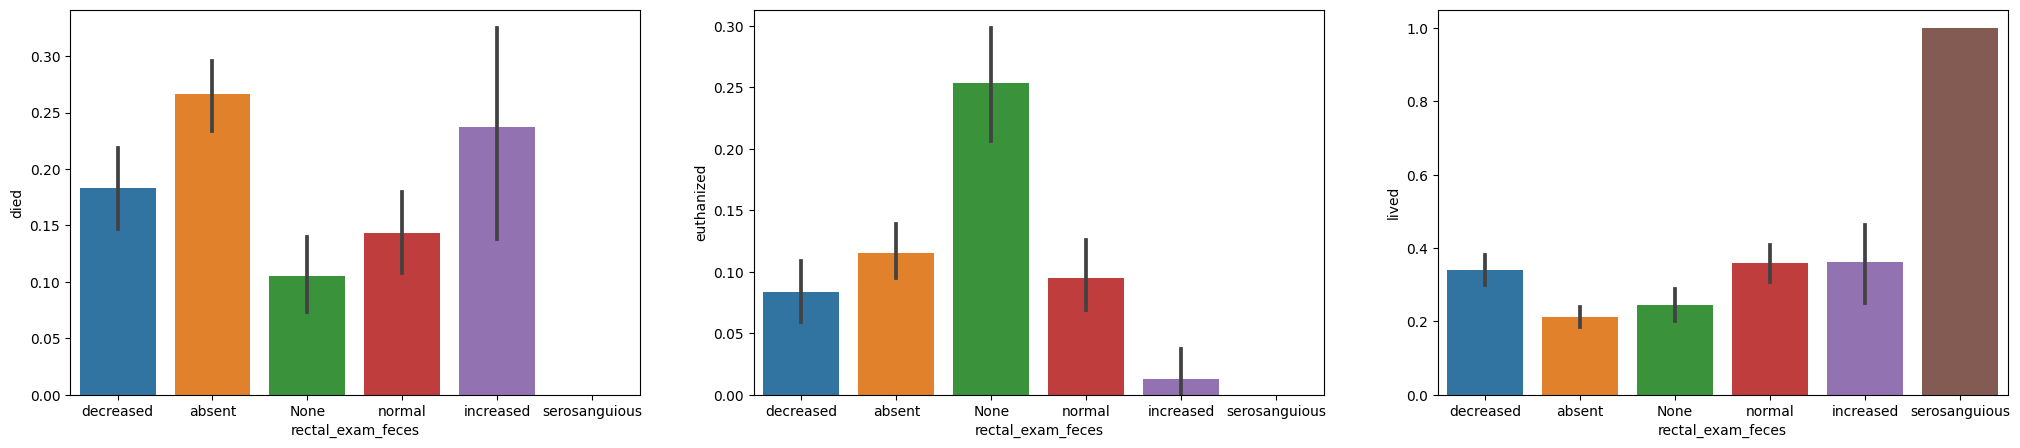

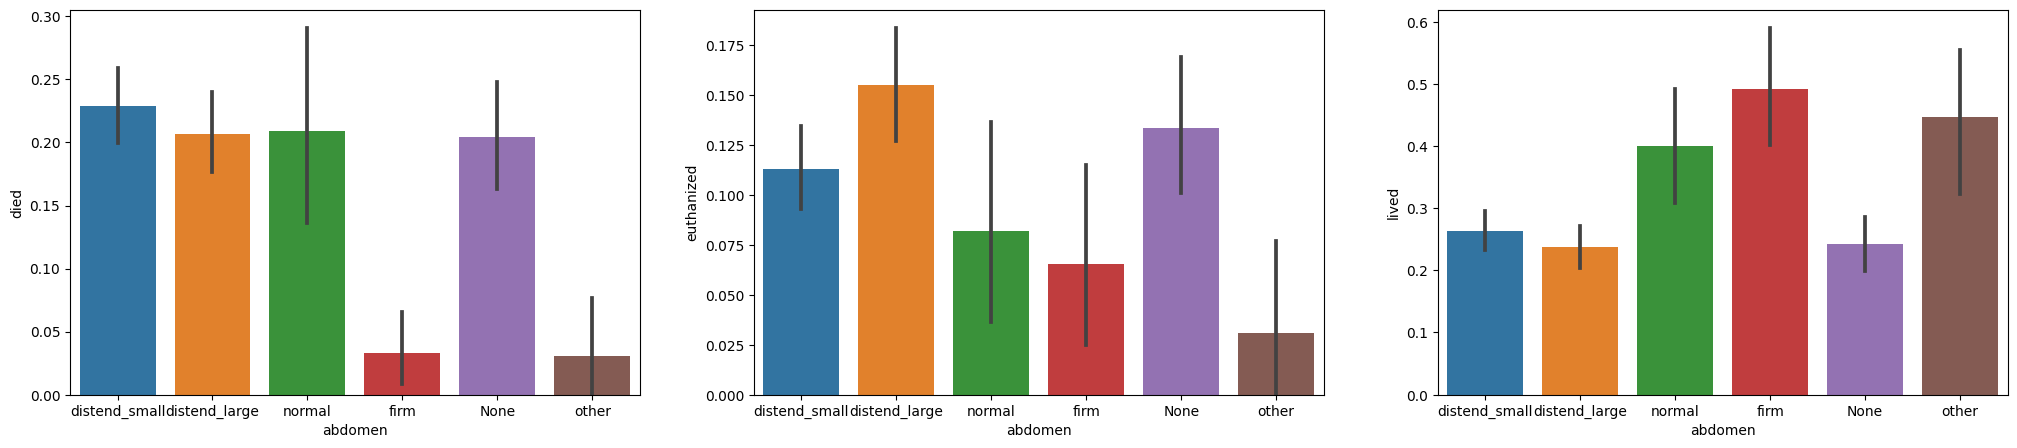

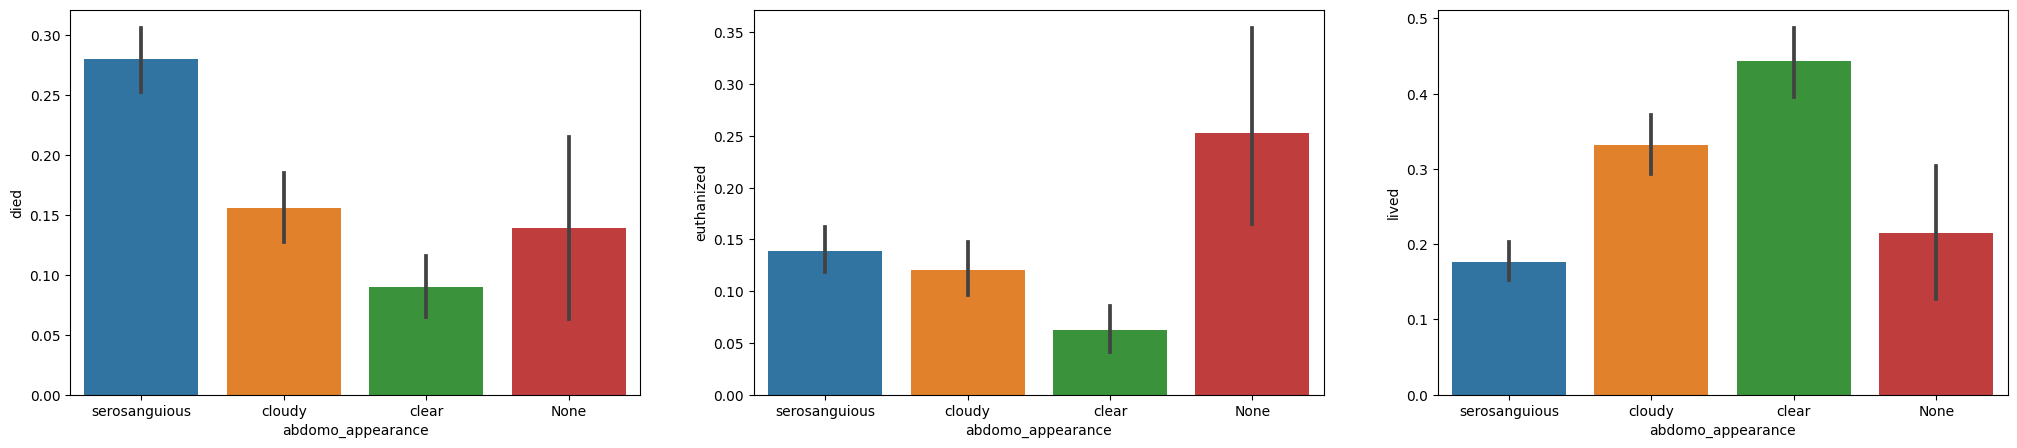

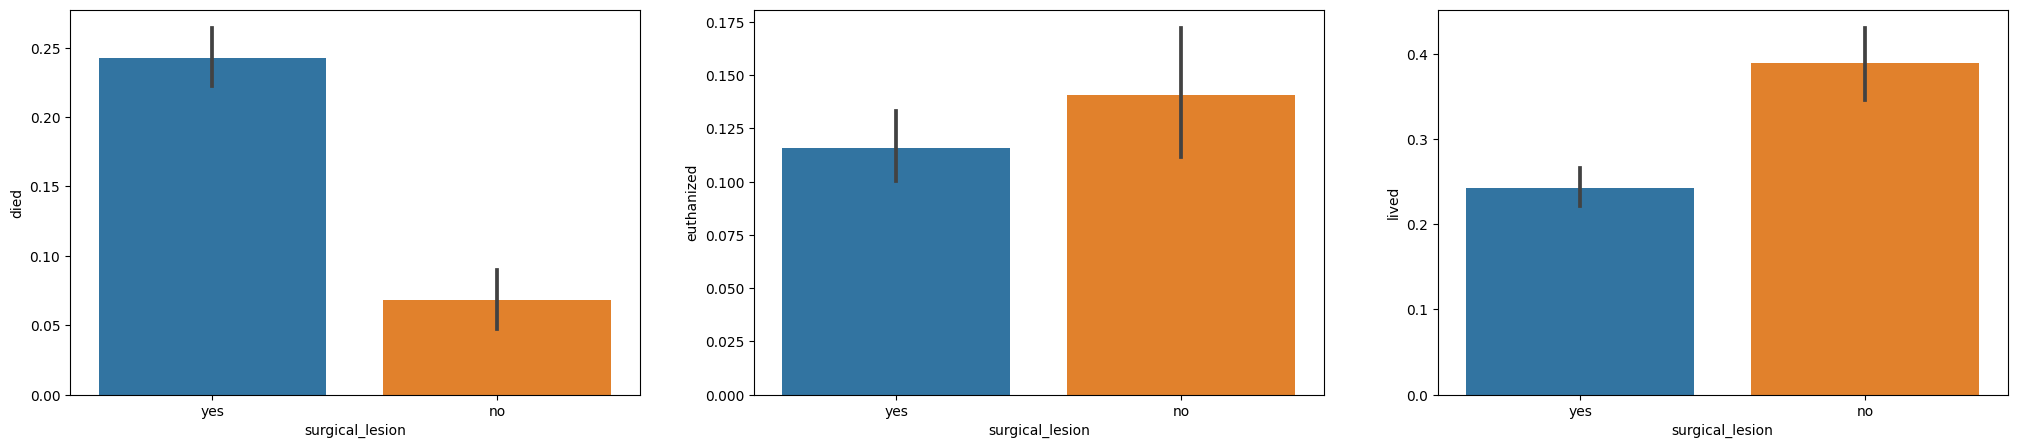

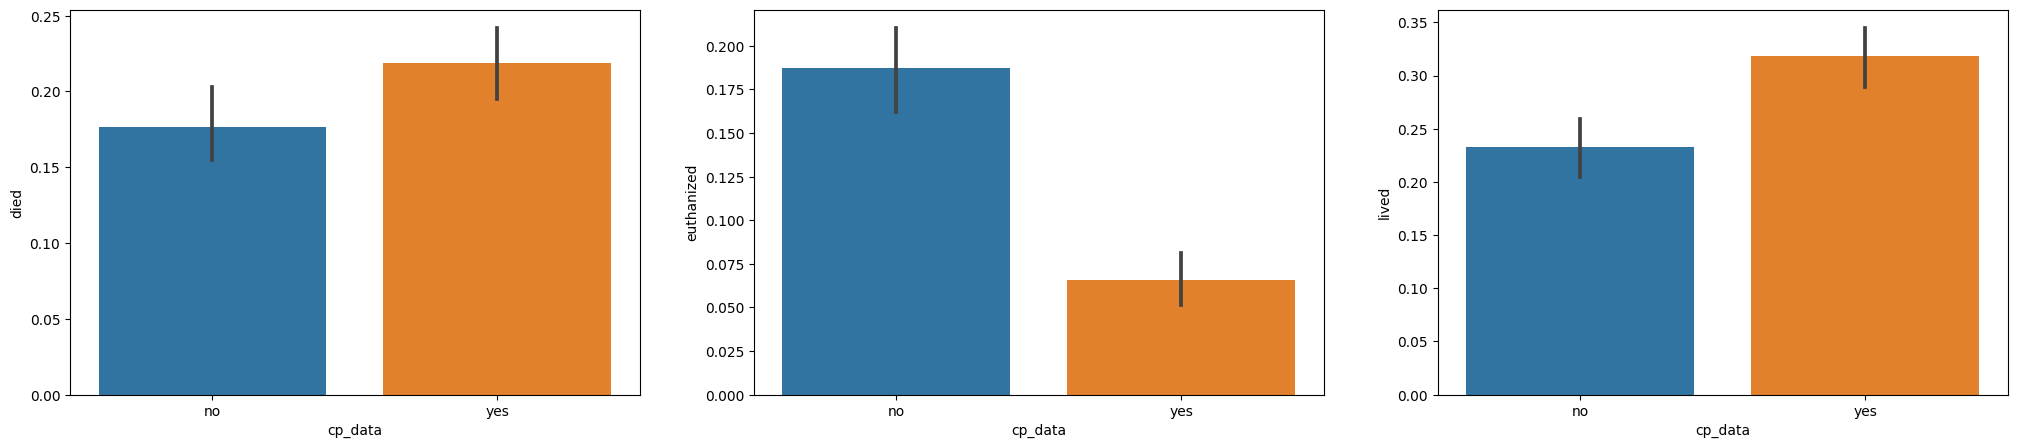

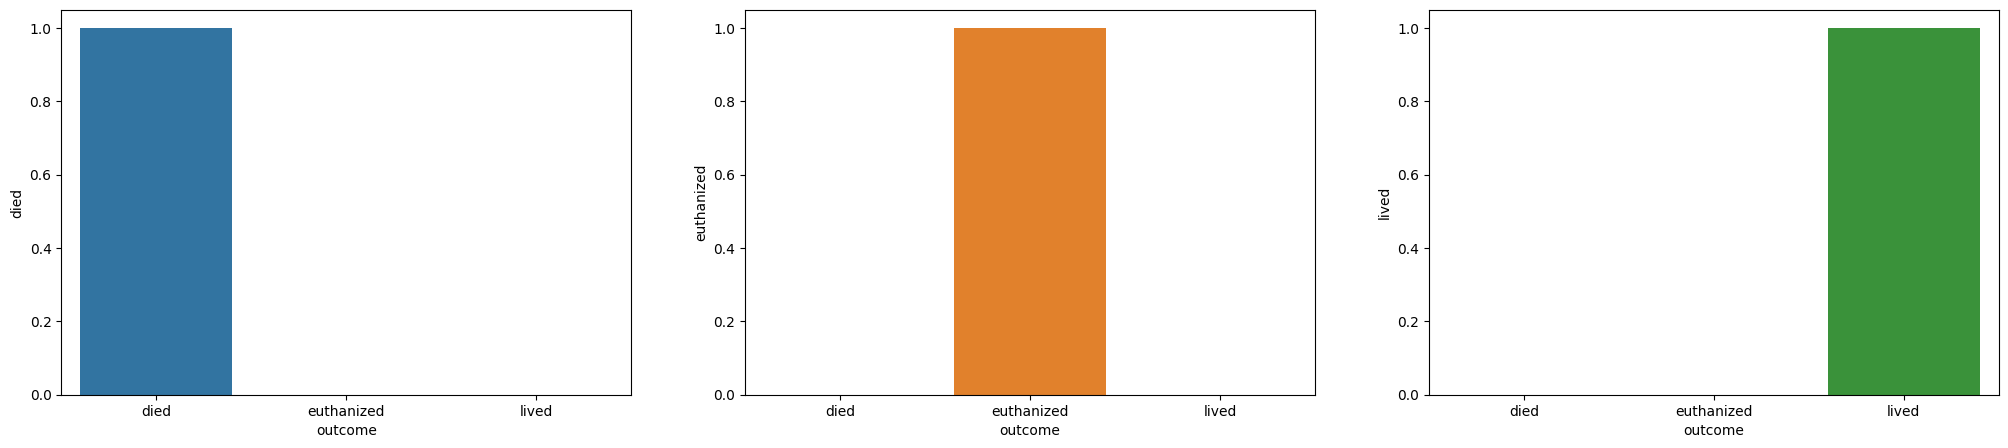

In [40]:
# object 변수들의 모든 plot 그리기
for col in object_list:
    obj_type_plot(col)

### 3-2. Number type 변수 탐색

In [41]:
# number type 변수 리스트만들기 (id 변수 제외)

num_list = []

for col in df.columns:
    if df[col].dtypes != "object" and col != 'id' and col != 'hospital_number':
        num_list.append(col)
    else :
        pass

In [42]:
for obj in num_list:
    n_unique = df[obj].nunique()
    print(obj, ":", n_unique)

rectal_temp : 43
pulse : 51
respiratory_rate : 42
nasogastric_reflux_ph : 30
packed_cell_volume : 51
total_protein : 85
abdomo_protein : 60
lesion_1 : 61
lesion_2 : 5
lesion_3 : 2
died : 2
euthanized : 2
lived : 2


In [44]:
# num type 변수 중 n unique가 4개 초과인 변수만 리스트업

num_list_2 = []
for obj in num_list:
    if df[obj].nunique() > 5 :
        num_list_2.append(obj)
num_list_2

['rectal_temp',
 'pulse',
 'respiratory_rate',
 'nasogastric_reflux_ph',
 'packed_cell_volume',
 'total_protein',
 'abdomo_protein',
 'lesion_1']

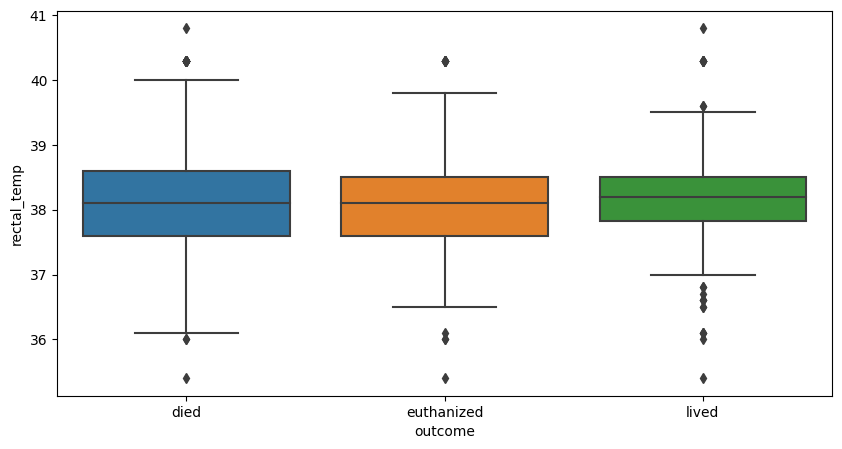

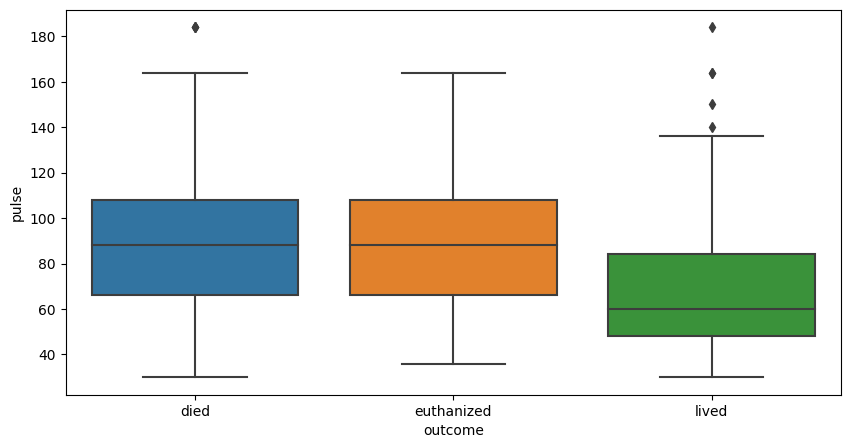

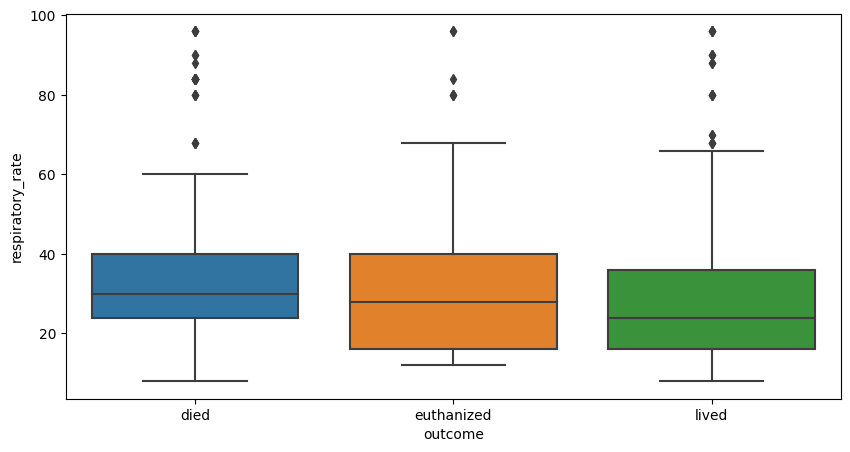

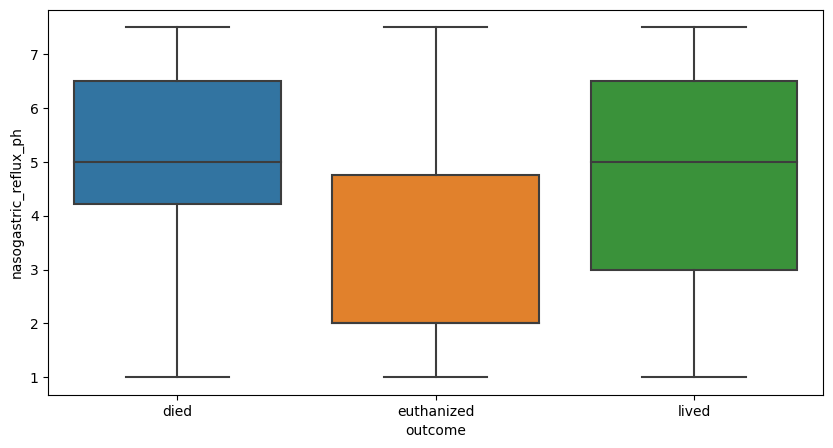

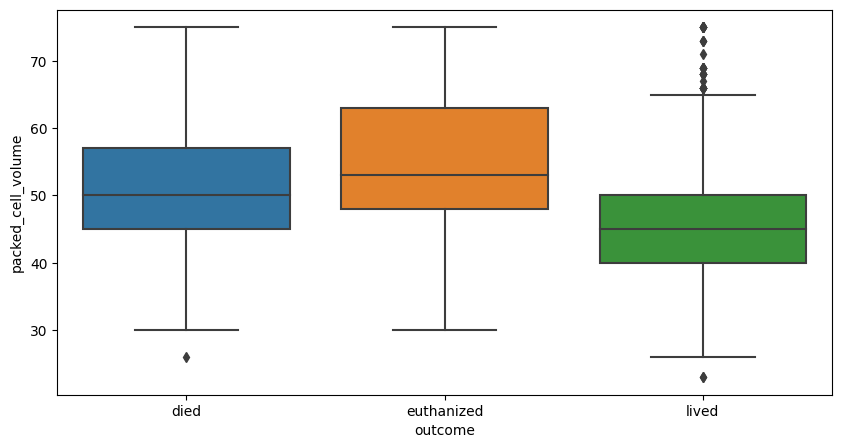

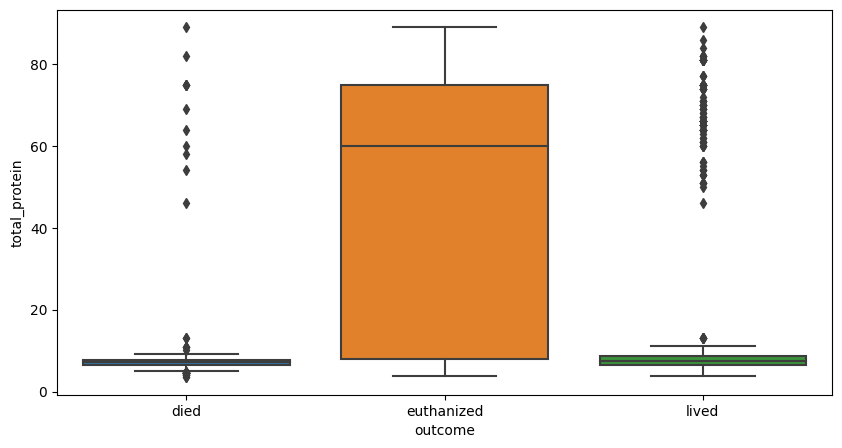

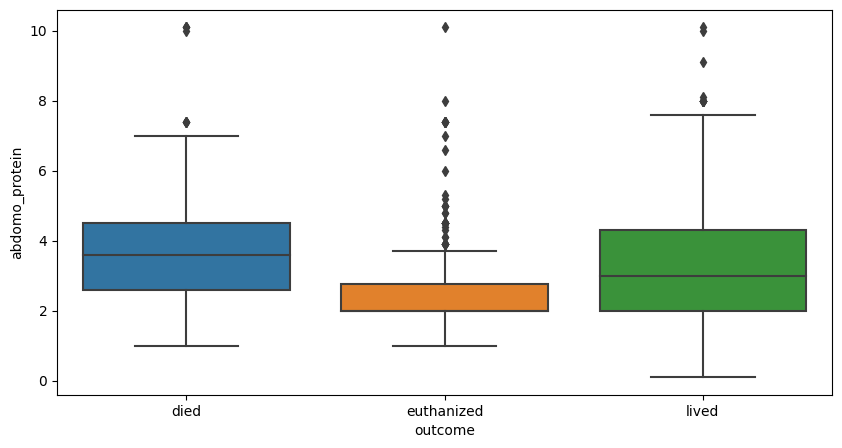

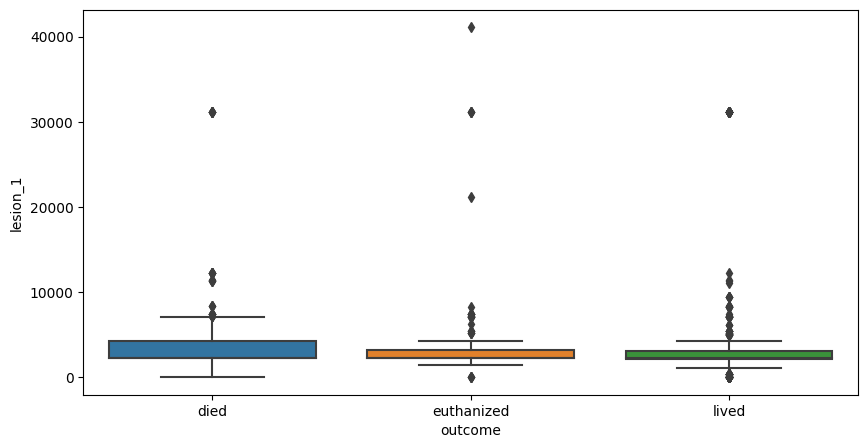

In [45]:
# 위에서 리스트업된 변수들 box plot

def box_plot(data, col) :
    fig, ax = plt.subplots(figsize = (10, 5))
    plot = sns.boxplot(data = data, x = 'outcome', y = col)
    return plot

for i in num_list_2:
    box_plot(df, i)

<Axes: xlabel='outcome', ylabel='lesion_1_log'>

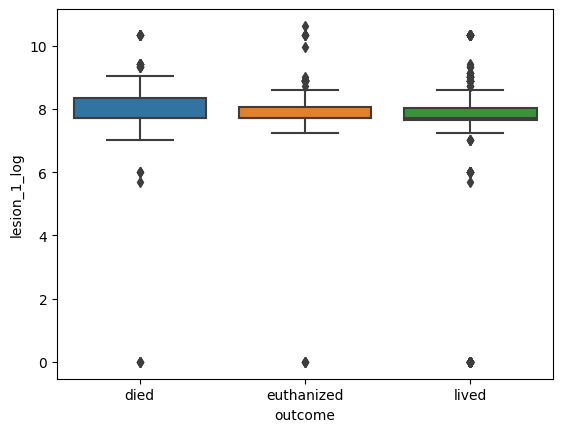

In [46]:
# lesion_1 을 로그변환하여 다시 확인

df['lesion_1_log'] = df['lesion_1'].map(lambda x : np.log(x) if x > 0 else 0)
sns.boxplot(data = df, x = 'outcome', y = 'lesion_1_log')

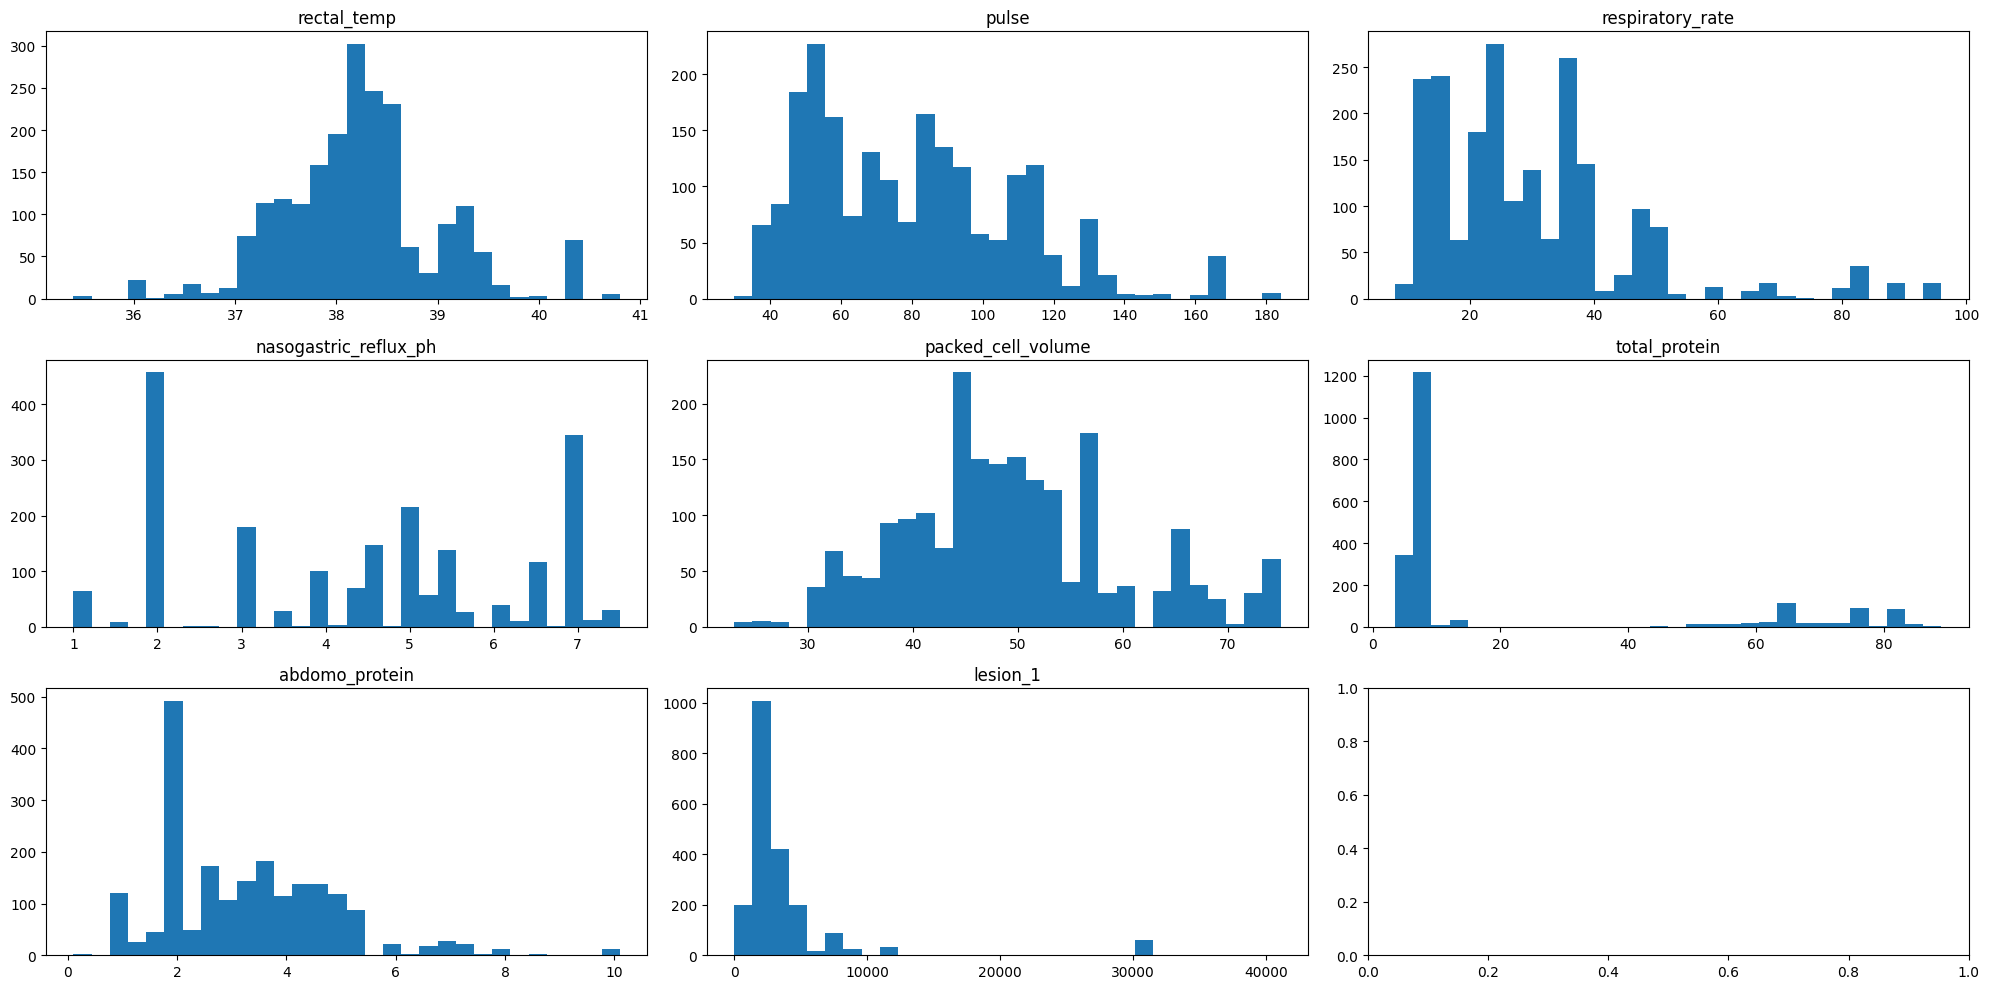

In [47]:
# n_unique > 4 변수들 분포 확인

fig, axe = plt.subplots(figsize = (20,10), nrows = 3, ncols = 3)


for row in range(3):
    for col in range(3) :
        idx = row*3 + col
        if idx < 8:
            axe[row][col].hist(df[num_list_2[idx]], bins = 30)
            axe[row][col].set_title(num_list_2[idx])
plt.tight_layout()

- pulse, respiratory_rate, abdomo_protein 은 log transformation 필요
- total_protein과 leison_1, leision_2, lesion_3는 0에 많이 치우침 => 다른 방식으로 feature 변형 필요

In [48]:
# lesion_2, lesion_3 이 0이 아닌 경우

df.loc[(df['lesion_2'] > 0) | (df['lesion_3'] > 0)]

# => died는 없음. 그러나 건수가 작아서 예측에 유의미한 변수로 볼 수 있을지는 미지수

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome,died,euthanized,lived,lesion_1_log
43,43,yes,adult,535196,38.0,130.0,16.0,cool,reduced,pale_cyanotic,...,no,3205,1400,0,no,euthanized,0,1,0,8.072467
58,58,yes,adult,533887,38.2,88.0,24.0,cool,reduced,bright_pink,...,yes,4205,3111,2209,no,euthanized,0,1,0,8.344030
76,76,no,adult,529427,37.5,88.0,24.0,normal,reduced,bright_red,...,no,3111,3112,0,yes,lived,0,0,1,8.042699
105,105,no,adult,5283431,38.0,54.0,24.0,normal,normal,normal_pink,...,no,3112,3112,0,yes,lived,0,0,1,8.043021
311,311,no,adult,534293,38.2,130.0,48.0,cold,reduced,pale_cyanotic,...,no,2209,1400,0,yes,euthanized,0,1,0,7.700295
523,523,yes,adult,535163,37.8,78.0,20.0,cool,reduced,pale_pink,...,yes,2207,1400,0,no,euthanized,0,1,0,7.699389
705,705,yes,adult,528461,38.0,112.0,44.0,cool,reduced,pale_cyanotic,...,yes,4205,3111,2209,yes,lived,0,0,1,8.344030
1015,1015,yes,adult,534787,38.2,36.0,16.0,cool,normal,bright_pink,...,yes,2209,1400,0,no,euthanized,0,1,0,7.700295
1370,1370,yes,adult,535208,37.8,48.0,16.0,normal,reduced,normal_pink,...,yes,3111,3111,0,no,NaN,0,0,0,8.042699
1628,1628,yes,adult,534293,38.2,132.0,16.0,cold,reduced,pale_cyanotic,...,no,1400,1400,0,no,NaN,0,0,0,7.244228


- leision_2와  leison_3는 카테고리 변수로 변형

<Axes: >

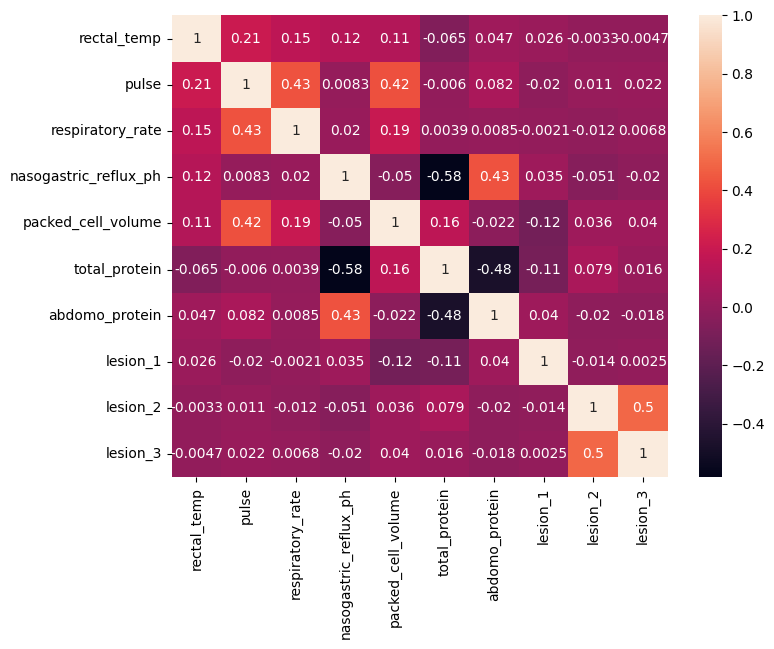

In [49]:
# numercial value들 사이의 heatmap 그려보기

plt.figure(figsize = (8,6))
sns.heatmap(df[num_list[:-3]].corr(), annot = True)

# => lesion_2와 lesion_3 둘 중 하나면 선택하거나 하나를 선택해서 category 변수로 변환? (0 초과면 1, 0이면 0)

- numeric 변수간의 correlation이 대체로 낮아서 굳이 제외할 필요는 없어 보임

## 5. Feature Engineering

- pulse, respiratory_rate, abdomo_protein 은 log transformation 필요- 
total_protein과 leison_1, leision_2, lesion_3는 0에 많이 치우침 => 다른 방식으로 feature 변형 필
- leision_2와 leison_3는 카테고리 변수로 변형요

In [57]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

In [63]:
# log tranformation for pulse, respiratory_rate, abdomo_protein

columns_to_transform = ['pulse', 'respiratory_rate', 'abdomo_protein']
df[columns_to_transform] = df[columns_to_transform].applymap(lambda x : np.log(x) if x > 0 else 0)

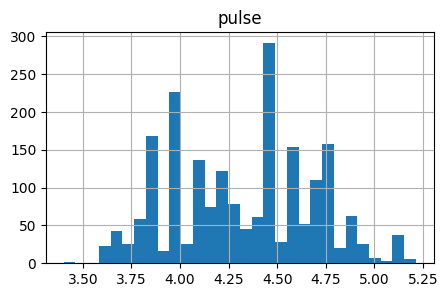

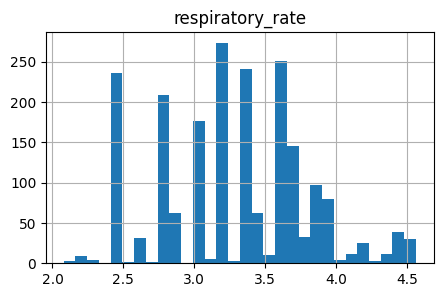

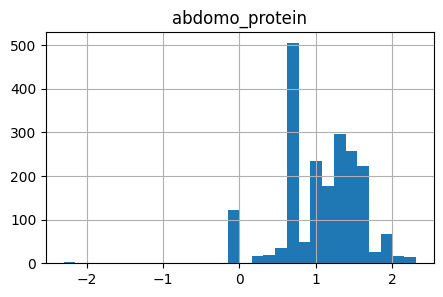

In [78]:
# histogram

def histogram(col) :
    fig, ax = plt.subplots(figsize = (5, 3))
    plot = df[col].hist(bins = 30)
    return plot

for col in columns_to_transform:
    histogram(col)
    plt.title(col)

In [82]:
# lesion_2, lesion_3

print(df['lesion_2'].value_counts())
print(df['lesion_3'].value_counts())

0       2047
1400       6
3111       3
3112       2
4300       1
Name: lesion_2, dtype: int64
0       2057
2209       2
Name: lesion_3, dtype: int64


In [84]:
# lesion_2, lesion_3 : 0보다 크면 1, 0이면 0

df[['lesion_2', 'lesion_3']] = df[['lesion_2', 'lesion_3']].applymap(lambda x : x == 1 if x > 0 else x)

In [ ]:
# total_protein, lesion_1

<Axes: >

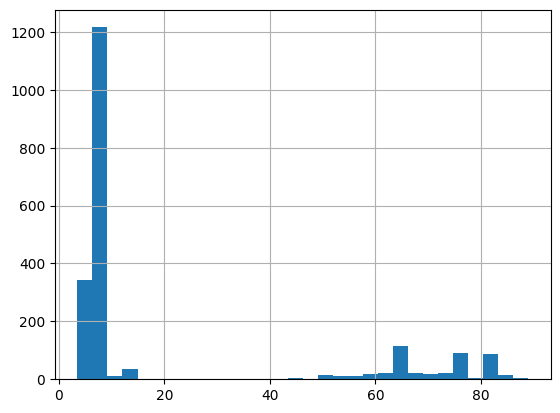

In [87]:
df['total_protein'].hist(bins = 30)

In [103]:
# total_protein : 임의의 range 지정

ranges = [0, 20, 40, 60, 80, 100]
range_bins = pd.cut(df_train['total_protein'], ranges)
range_bins.value_counts()

(0, 20]      955
(60, 80]     173
(80, 100]     61
(40, 60]      46
(20, 40]       0
Name: total_protein, dtype: int64

In [104]:
# total_protein : frequency가 동일하게 binning 

q_bins = pd.qcut(df_train['total_protein'], 5)
q_bins.value_counts()

(3.499, 6.5]    281
(7.84, 56.2]    247
(56.2, 89.0]    247
(6.5, 7.2]      244
(7.2, 7.84]     216
Name: total_protein, dtype: int64

In [108]:
# total_protein : 여기서는 임의의 range로 지정 => 나중에 statsmodel package되는지 확인

ranges = [0, 20, 40, 60, 80, 100]
range_bins = pd.cut(df['total_protein'], ranges)
df['total_protein'] = range_bins

<Axes: >

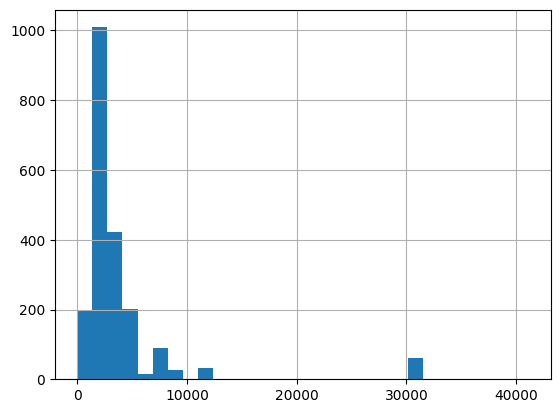

In [109]:
# lesion_1 histogram
df['lesion_1'].hist(bins = 30)

<Axes: >

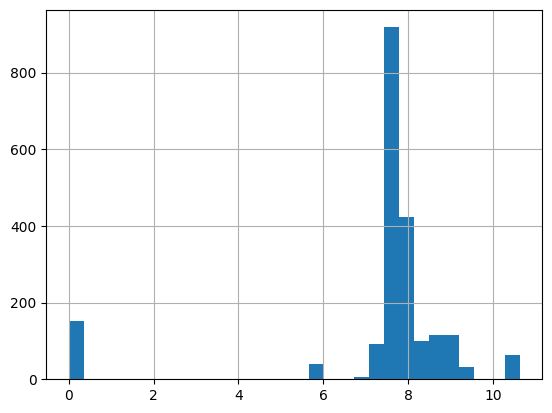

In [111]:
df['lesion_1'].map(lambda x : np.log(x) if x > 0 else 0).hist(bins = 30)

=> log transformation이 더 나은듯

In [112]:
# leision_1 log transformation

df['lesion_1'] = df['lesion_1'].map(lambda x : np.log(x) if x > 0 else 0)

## 5. Feature selection

### 5-1. Statistical Method

In [105]:
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [181]:
X = df[num_list_2]
y = df['outcome']

selector = SelectKBest(f_classif, k=6)
selector.fit(X, y)

anova_res = pd.DataFrame({'var' : X.columns, 'pvalues' : np.round(selector.pvalues_,7)})
anova_res.sort_values(by = 'pvalues')

,var,pvalues
1,pulse,0.000000
2,respiratory_rate,0.000000
3,nasogastric_reflux_ph,0.000000
4,packed_cell_volume,0.000000
5,total_protein,0.000000
6,abdomo_protein,0.000000
7,lesion_1,0.531110
0,rectal_temp,0.549483


In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 2)

clf = make_pipeline(SelectKBest(f_classif, k=6), MinMaxScaler(), SVC())
clf.fit(X_train, y_train)
print(
    "Classification accuracy without selecting features: {:.3f}".format(
        clf.score(X_test, y_test)
    )
)

Classification accuracy without selecting features: 0.641


### => 'rectal_temp'와 'lesion_1'은 제외해도 무방

In [200]:
# Categorical Feature selection

from sklearn.ensemble import ExtraTreesClassifier

X = pd.get_dummies(df[object_list], drop_first = True)
y = df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 2)

etc_model = ExtraTreesClassifier(random_state = 10)
etc_model.fit(X_train, y_train)
y_pred = etc_model.predict(X_test)

result = pd.DataFrame({'vars' : X.columns, 'Imp' : etc_model.feature_importances_})
len(y_pred)


309

In [197]:
from sklearn.metrics import accuracy_score, f1_score

f1_score(y_test, y_pred, average='weighted')

1.0

In [203]:
# Recursive feature Elimination 방법

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfe = RFE(model)
fit = rfe.fit(X,y)

In [218]:
print("Number of selected features :", fit.n_features_)

Number of selected features : 29


In [219]:
selected = pd.DataFrame({'var' : X.columns, 'selected' : fit.support_})
selected.loc[selected['selected'] == True]

,var,selected
0,surgery_yes,True
1,age_young,True
3,temp_of_extremities_cool,True
4,temp_of_extremities_normal,True
8,peripheral_pulse_normal,True
9,peripheral_pulse_reduced,True
13,mucous_membrane_normal_pink,True
15,mucous_membrane_pale_pink,True
17,capillary_refill_time_less_3_sec,True
18,capillary_refill_time_more_3_sec,True


## 5-2. Feature selection by L1 regularization

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [178]:
obj_list = []
for col in df.columns :
    if df[col].dtypes == 'object' and col != 'outcome':
        obj_list.append(col)
    elif df[col].dtypes == 'category' and col != 'outcome':
        obj_list.append(col)

In [179]:
df_dummy = pd.get_dummies(df, columns = obj_list, drop_first = True)

C:\Users\soyou\AppData\Local\Temp\ipykernel_32732\394151518.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_dummy = pd.get_dummies(df, columns = obj_list, drop_first = True)
C:\Users\soyou\AppData\Local\Temp\ipykernel_32732\394151518.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_dummy = pd.get_dummies(df, columns = obj_list, drop_first = True)


In [180]:
df['outcome'] = df['outcome'].map({'died' : 0, 'euthanized': 1, 'lived' :2})

In [182]:
X = df_dummy.loc[~df_dummy['outcome'].isna()].drop(['id','hospital_number', 'outcome'], axis = 1)
y = df.loc[~df['outcome'].isna(), 'outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 2)

In [188]:
# logistic model with L1 regularization

lr = LogisticRegression(penalty  = 'l1', solver = 'liblinear', random_state = 10)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('f1 Score :', f1_score(y_test, y_pred, average = 'weighted'))

Accuracy Score : 0.6343042071197411
f1 Score : 0.6289052622939235


In [211]:
# Logistic model : important features

lr_res = pd.DataFrame({'col' : list(lr.feature_names_in_), 'coef_died' : list(lr.coef_[0]), 'coef_enthu' : list(lr.coef_[1]),
                      'coef_lived' : list(lr.coef_[2])})
non_imp_features = lr_res.loc[(lr_res['coef_died'] == 0) & (lr_res['coef_enthu'] == 0) & (lr_res['coef_lived'] == 0), 'col'].tolist()
non_imp_features

['peripheral_pulse_increased',
 'capillary_refill_time_None',
 'pain_moderate',
 'pain_slight',
 'peristalsis_distend_small',
 'nasogastric_reflux_less_1_liter',
 'nasogastric_reflux_slight',
 'rectal_exam_feces_serosanguious',
 'abdomen_other',
 'total_protein_(20, 40]',
 'abdomo_appearance_serosanguious']

## 6. Modeling

In [217]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [218]:
# cross validation split 정의
kfold = StratifiedKFold(n_splits = 5)

In [226]:
X_new = X.drop(non_imp_features, axis = 1)

In [237]:
# Train, Test set split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, stratify = y, random_state = 2)

### 6-1. Searching best models

Text(0.5, 1.0, 'Cross Validation Score')

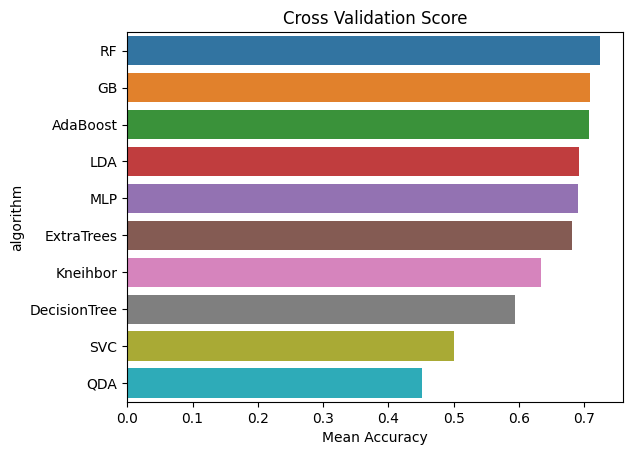

In [232]:
random_state = 10

classifiers = [SVC(random_state = random_state),
               RandomForestClassifier(random_state = random_state),
               AdaBoostClassifier(random_state = random_state),
               GradientBoostingClassifier(random_state = random_state),
               ExtraTreesClassifier(random_state = random_state),
               LinearDiscriminantAnalysis(),
               QuadraticDiscriminantAnalysis(),
               KNeighborsClassifier(),
               DecisionTreeClassifier(random_state = random_state),
               MLPClassifier(random_state = random_state)]

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y_train, cv = kfold, scoring = 'accuracy', n_jobs = -1))

cv_means = []
cv_std = []

for cv_result in cv_results :
    cv_means.append(np.mean(cv_result))
    cv_std.append(np.std(cv_result))

algorithm = ['SVC', 'RF', 'AdaBoost', 'GB', 'ExtraTrees', 'LDA', 'QDA', 'Kneihbor', 'DecisionTree', 'MLP']
cv_res = pd.DataFrame({'algorithm' : algorithm, 'mean_accuracy' : cv_means, 'error_score' : cv_std})
cv_res = cv_res.sort_values(by = 'mean_accuracy', ascending = False)

g = sns.barplot(data = cv_res, x = 'mean_accuracy', y = 'algorithm')
g.set_xlabel('Mean Accuracy')
g.set_title('Cross Validation Score')

In [233]:
cv_res

,algorithm,mean_accuracy,error_score
1,RF,0.723534,0.034654
3,GB,0.709445,0.047339
2,AdaBoost,0.707347,0.017161
5,LDA,0.692212,0.039519
9,MLP,0.691113,0.022647
4,ExtraTrees,0.681401,0.027819
7,Kneihbor,0.633868,0.029739
8,DecisionTree,0.593932,0.038176
0,SVC,0.501104,0.024961
6,QDA,0.451258,0.085594


### 6-2. Hyperparameter tuning for best models

In [239]:
# Random Forest

rfC = RandomForestClassifier()

rf_param_grid = {'n_estimators' : [100, 300, 500],
                 'max_depth' : [5, 10, 15, 20],
                 'min_samples_leaf' : [1, 2, 4],
                 'min_samples_split' : [2, 5, 10]}

gs_rfC = GridSearchCV(rfC, rf_param_grid, cv = kfold, scoring = 'accuracy', n_jobs = -1, verbose = 1)
gs_rfC.fit(X_train, y_train)

rfC_best = gs_rfC.best_estimator_

# Best Score & parameter
print("Best Score :", gs_rfC.best_score_)
print("Best parameters: ", gs_rfC.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Score : 0.7235106073815751
Best parameters:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [243]:
# Gradient Boost

gbC = GradientBoostingClassifier()

gb_param_grid = {'n_estimators' : [100, 300, 500],
                 'max_depth' : [5, 10, 15, 20],
                 'min_samples_leaf' : [0.03, 0.05, 0.07, 0.1],
                 'min_samples_split' : [0.03, 0.05, 0.07, 0.1],
                 'learning_rate' : [0.1, 0.01, 0.05]}

gs_gbC = GridSearchCV(gbC, gb_param_grid, scoring = 'accuracy', cv = kfold, n_jobs = -1, verbose = 1)
gs_gbC.fit(X_train, y_train)

gbC_best = gs_gbC.best_estimator_

# Best Score & parameter
print("Best Score :", gs_gbC.best_score_)
print("Best parameters: ", gs_gbC.best_params_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Score : 0.7364952048823017
Best parameters:  {'learning_rate': 0.1, 'max_depth': 15, 'min_samples_leaf': 0.07, 'min_samples_split': 0.1, 'n_estimators': 100}


In [246]:
# Adaboost

abC = AdaBoostClassifier()

ab_param_grid = {'n_estimators' : [100, 200, 500, 1000],
                 'learning_rate' : [0.1, 0.01, 0.05]}

gs_abC = GridSearchCV(abC, ab_param_grid, scoring = 'accuracy', cv = kfold, n_jobs = -1, verbose = 1)
gs_abC.fit(X_train, y_train)

abC_best = gs_abC.best_estimator_

# Best Score & parameter
print("Best Score :", gs_abC.best_score_)
print("Best parameters: ", gs_abC.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Score : 0.7159953501888985
Best parameters:  {'learning_rate': 0.1, 'n_estimators': 500}


### 6-3. Fitting test data with Voting Classifier

In [267]:
# Voting
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

VotingC = VotingClassifier(estimators = [('rfc',rfC_best), ('gbc', gbC_best), ('abC',abC_best)], voting = 'soft', n_jobs = -1)
VotingC.fit(X_train, y_train)
y_pred = VotingC.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred, average = 'micro'))
print(accuracy_score(y_test, y_pred))

[[ 63   6  33]
 [ 13  35  15]
 [ 17  12 115]]
0.6893203883495146
0.6893203883495146


In [262]:
df_train['outcome'].unique()

array(['died', 'euthanized', 'lived'], dtype=object)

<Axes: >

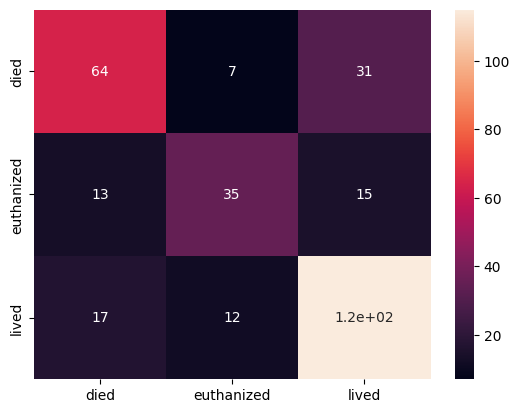

In [266]:
d = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['died','euthanized', 'lived'], index =['died','euthanized', 'lived'])
sns.heatmap(round(d,0), annot = True)

### 6-4. (reference) Trying HistGradientBoostingClassifier

In [294]:
# HistGradientBoostingClassifier 사용해보기

# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier

HistGB = HistGradientBoostingClassifier(random_state = 10)
HistGB.fit(X_train, y_train)
y_pred_hgb = HistGB.predict(X_test)

print(f1_score(y_test, y_pred, average = 'micro'))
print(accuracy_score(y_test, y_pred))

0.6893203883495146
0.6893203883495146


In [298]:
HistGB = HistGradientBoostingClassifier()

parameters = {
 'max_iter': [1000,1200,1500],
 'learning_rate': [0.1],
 'max_depth' : [25, 50, 75],
 'l2_regularization': [1.5]}
#instantiate the gridsearch
hgb_grid = GridSearchCV(HistGB, parameters, n_jobs=-1, 
 cv=5, scoring='f1_micro',
 verbose=2, refit=True)
#fit on the grid 
hgb_grid.fit(X_train, y_train)

# Print the best parameters found
print(hgb_grid.best_params_)
# Print the best scores found
print()
print(hgb_grid.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'l2_regularization': 1.5, 'learning_rate': 0.1, 'max_depth': 25, 'max_iter': 1000}

0.6986980528916014


=> not superior

## 7. Test data set prediction for Kaggle Submission

In [289]:
# Test Data prediction

df_dummy_new = df_dummy.drop(non_imp_features, axis = 1)
X_test_final = df_dummy_new.loc[df_dummy_new['outcome'].isna()].drop(['id','hospital_number', 'outcome'], axis = 1)
y_pred_final = VotingC.predict(X_test_final)

In [290]:
df_test_new = df_test[['id']].copy()
df_test_new['outcome'] = y_pred_final

In [299]:
df_test_new['outcome'] = df_test_new['outcome'].map({0:'died', 1: 'euthanized', 2 : 'lived'})

In [303]:
# 결과 저장하기
df_test_new.to_csv('outcome_submission.csv', index = False)

=> Final Score by Kaggle is 0.75